First, let's instanciate all components

In [3]:
from signreader.engine.text import TextReader
from signreader.engine.sign import SignDetector
from signreader.engine.symbol import SymbolDetector

textreader = TextReader()
signdetector = SignDetector()
symbdetector = SymbolDetector()



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.4 
platform:       	darwin 
python version: 	3.10.16 
torch version:  	2.7.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




Then, load an image:

In [2]:
from PIL import Image
import numpy as np

img_pil = Image.open('/Users/manu/boulot/unit_solutions/data/datasets/segmentation/cellpose/test/48173-1_2.jpg')
img_np = np.asarray(img_pil)

Detect the signs:

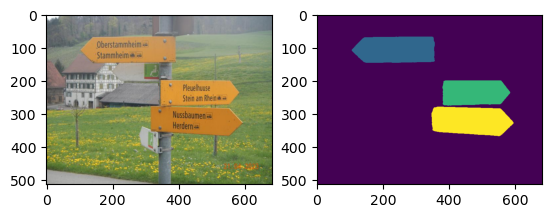

In [4]:
masks = signdetector(img_np)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
axes[0].imshow(img_np)
axes[1].imshow(masks)

..Now, let's analyze each individual sign. First, use the mask to focus on considered sign:

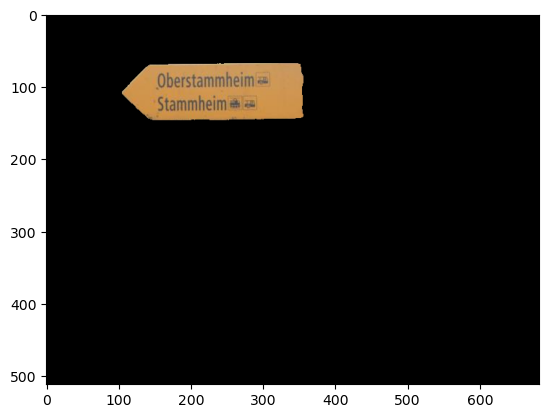

In [25]:
idx_list_signs = np.unique(masks)[1:] # first element is '0' and stands for background -> ignore

idx_signs = 1
mask_sign = masks==idx_signs

img_np_focus = np.zeros(img_np.shape, dtype=np.uint8)
for channel in range(3):
    img_np_focus[:,:,channel] = img_np[:,:,channel] * mask_sign

fig, axes = plt.subplots(1,1)
axes.imshow(img_np_focus)

Now, let's detect text:

In [28]:
img_pil_focus = Image.fromarray(img_np_focus, 'RGB')
scontent = textreader(img_pil_focus)
print(scontent)

NameError: name 'self' is not defined